<a href="https://colab.research.google.com/github/gitmattalves/Regressao_Linear_Consumo_de_Cerveja/blob/main/Regress%C3%A3o_Linear_Consumo_de_Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Regressão Linear

---






## O Dataset e o Projeto



Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

**Descrição:**

A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

O objetivo deste treinamento será estimar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

**Dados:**

**data** - Data

**temp_media** - Temperatura Média (°C)

**temp_min** - Temperatura Mínima (°C)

**temp_max** - Temperatura Máxima (°C)

**chuva** - Precipitação (mm)

**fds** - Final de Semana (1 = Sim; 0 = Não)

**consumo** - Consumo de Cerveja (litros)

**Importando as bibliotecas**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Leitura dos dados**

In [11]:
dados = pd.read_csv('/content/sample_data/Consumo_cerveja.csv', ';')

<ipython-input-11-b8f4b313540a>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dados = pd.read_csv('/content/sample_data/Consumo_cerveja.csv', ';')


**Visualização dos dados**

In [12]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


**Verificando o tamanho do Dataset**

In [14]:
dados.shape

(365, 7)

# Análises Preliminares

In [17]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


### Matriz de Correlação

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

In [20]:
dados.corr().round(4)

<ipython-input-20-fb159fd1543a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().round(4)


,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


<ipython-input-29-e1036c7225de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr().round(4)


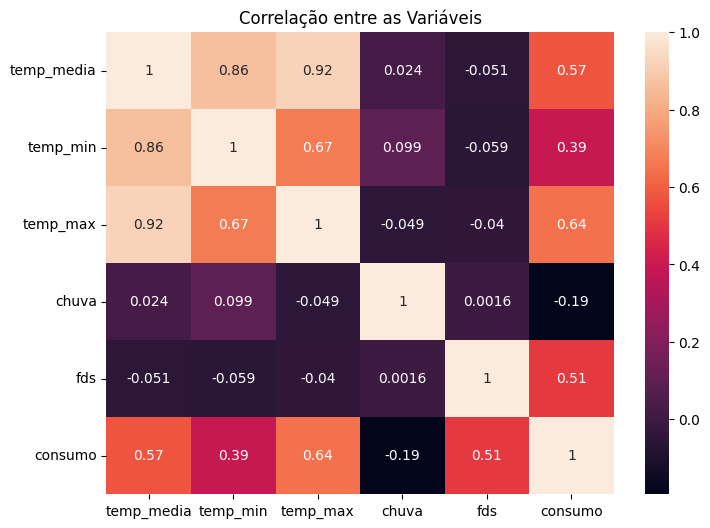

In [29]:
correlacao = dados.corr().round(4)
                                
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.heatmap(correlacao, annot=True)
plt.title("Correlação entre as Variáveis")
plt.show()